# Measuring Policy and Collecting Statistics

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from decimal import Decimal
from math import pi

https://www.bls.gov/pir/spmhome.htm

SPM - Supplemental Poverty Measure

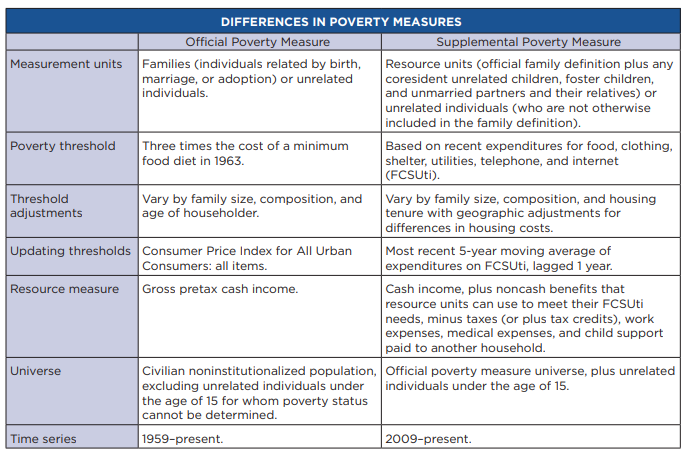

In [2]:
Image("Differences_in_Poverty_Measures.png")

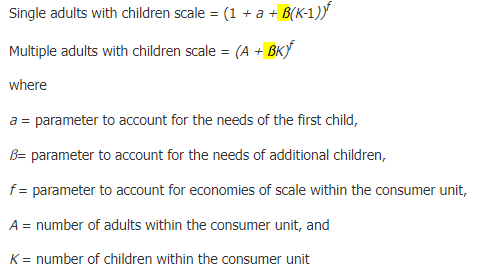

In [3]:
Image("equation.png")

The previously published Research SPM thresholds were based on a range of FCSU expenditures centered on the 33rd percentile using data from an estimation sample composed of consumer units with exactly two children and any number of adults. These expenditures were equivalized to the expenditures of a consumer unit with two adults and two children through the use of the three-parameter equivalence scale proposed by Betson (1996).

The parameters a, ß, and f were estimated by Betson to fit the literature on the cost of children, and when rounded, were 0.8, 0.5, and 0.7, respectively.

David Betson, University of Notre Dame.

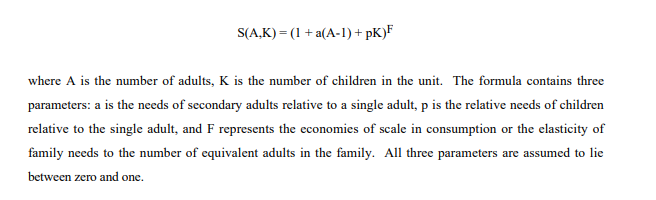

In [4]:
Image("original_equation.png")

In [119]:
a = np.array([1,0.7,0.85,1,0.8,0.7]) # parameter to account for the needs of the first child
ß = np.array([1,0.7,0.85,1,0.5,0.45]) # parameter to account for the needs of additional children
f = np.array([0.5,0.75,0.65,0.6,0.7,0.75]) # parameter to account for economies of scale within the consumer unit
def Single_Adults_with_children(K): # number of children within the consumer unit
    scale = (1 + a + ß*(K-1))**f
    return scale

def Multiple_Adults_with_children(A, # number of adults within the consumer unit
                                  K):# number of children within the consumer unit
    scale = (A + ß*K)**f
    return scale

In [33]:
print(Single_Adults_with_children(2))
#print("{:.3F}".format(Decimal(Multiple_Adults_with_children(2,2))))

[1.73205081 1.92822821 1.907157   1.93318204 1.79146977 1.77553339]


In [34]:
Number_of_children = []
for i in range(1,11):
    Number_of_children.append(i)
Number_of_children = np.array(Number_of_children)
print(Number_of_children)

[ 1  2  3  4  5  6  7  8  9 10]


<IPython.core.display.Javascript object>


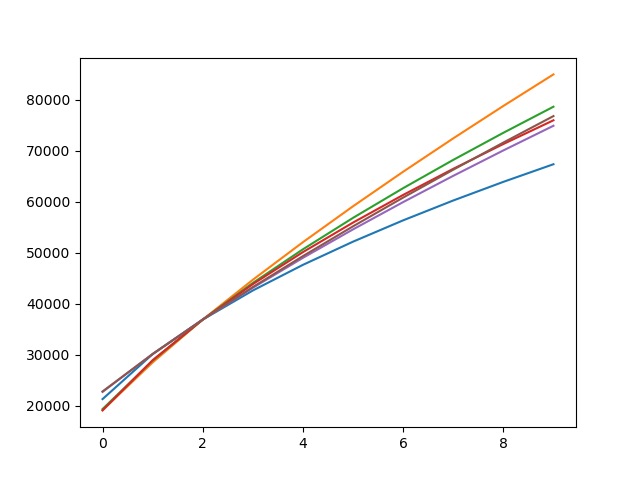

ValueError: operands could not be broadcast together with shapes (6,) (10,) 

In [35]:
plt.figure("SPM multiplier with respect to number of children and adults")
plt.plot(Number_of_children,Single_Adults_with_children(Number_of_children), color= 'grey',label = "1 Adult")
plt.plot(Number_of_children,Multiple_Adults_with_children(2,Number_of_children), color = 'orange',label = "2 Adult")
plt.plot(Number_of_children,Multiple_Adults_with_children(3,Number_of_children), color = "green",label = "3 Adult")
plt.plot(Number_of_children,Multiple_Adults_with_children(4,Number_of_children), color = "blue",label = "4 Adult")
plt.plot(Number_of_children,Number_of_children*0.28 + 1.231, linestyle ="--", color = "red",label = "Fit Line for basic model")
plt.legend()
plt.xlabel("# of children")
plt.ylabel("SPM Multiplier")

In [9]:
def SPM_Threshold(FCSU_E, # sum of expenditures for food, clothing, shelter and utilities
                  SU_E,   # shelter and utilities portions of FCSU
                  SU_Eh): # shelter and utilities portions of FCSU.... 
                          # ....to one of three housing tenure groups
                          # Owners with mortgages
                          # Owners without mortgages
                          # Renters.
    Threshold = 1.2*(FCSU_E) - (SU_E) + (SU_Eh)
    return Threshold # This was only ever used to calculate 2 adults and 2 children

In [10]:
Multiple_Adults_with_children(2,2)

2.157669279974593

So this means our equation that calculated the SPM Threshold for 2 Adults and 2 Children got us 3 numbers 

$$ $30,870$$
$$ $36,915$$
$$ $37,482$$

so our value absent of any multipliers is 
$$ \frac{$30,870}{2.1577} and \frac{$36,915}{2.1577} and \frac{$37,482}{2.1577}$$
or 


In [11]:
Mortgage = 36915/Multiple_Adults_with_children(1,2)
No_Mortgage = 30870/Multiple_Adults_with_children(1,2)
Renter = 37482/Multiple_Adults_with_children(1,2)
print(Mortgage)
print(No_Mortgage)
print(Renter)

22723.848009313795
19002.714019978783
23072.87745049708


This allows us to use our graph along with these multipliers to find out SPM

In [12]:
def Threshold_Finder(single_or_multiple,housing,number_of_kids):
    if (single_or_multiple <= 1):
        if (housing == Mortgage):
            Threshold = Single_Adults_with_children(number_of_kids)*Mortgage
        elif (housing == No_Mortgage):
            Threshold = Single_Adults_with_children(number_of_kids)*No_Mortgage
        elif (housing == Renter):
            Threshold = Single_Adults_with_children(number_of_kids)*Renter
        else:
            Threshold = 0
    else:
        if (housing == Mortgage):
            Threshold = Multiple_Adults_with_children(single_or_multiple,number_of_kids)*Mortgage
        if (housing == No_Mortgage):
            Threshold = Multiple_Adults_with_children(single_or_multiple,number_of_kids)*No_Mortgage
        if (housing == Renter):
            Threshold = Multiple_Adults_with_children(single_or_multiple,number_of_kids)*Renter
        else:
            Threshold = 0
    
    return Threshold

In [13]:
adults = 1
housing = Renter
children = 2

print("${:.2F}".format(Decimal(Threshold_Finder(adults,housing,children))),"with a telephone")
print("${:.2F}".format(Decimal(Threshold_Finder(adults,housing,children)*0.83)),"without a telephone")

$41334.36 with a telephone
$34307.52 without a telephone


<IPython.core.display.Javascript object>


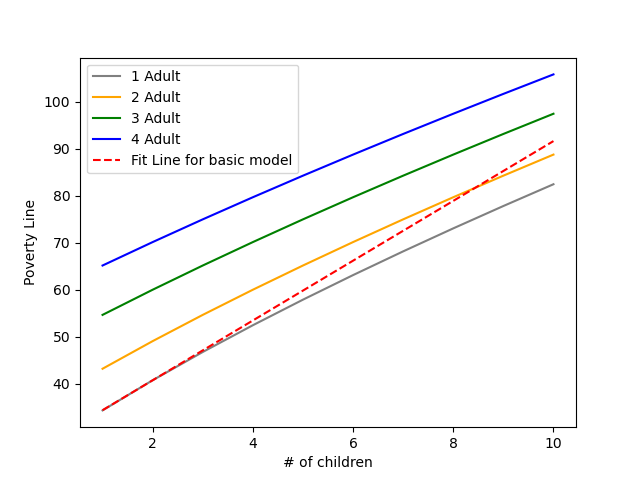

Text(0, 0.5, 'Poverty Line')

In [14]:
plt.figure("SPM Threshold with respect to number of children and adults: Mortgage ")
plt.plot(Number_of_children,Mortgage*Single_Adults_with_children(Number_of_children)/1000, color= 'grey',label = "1 Adult")
plt.plot(Number_of_children,Mortgage*Multiple_Adults_with_children(2,Number_of_children)/1000, color = 'orange',label = "2 Adult")
plt.plot(Number_of_children,Mortgage*Multiple_Adults_with_children(3,Number_of_children)/1000, color = "green",label = "3 Adult")
plt.plot(Number_of_children,Mortgage*Multiple_Adults_with_children(4,Number_of_children)/1000, color = "blue",label = "4 Adult")
plt.plot(Number_of_children,Mortgage*(Number_of_children*0.28 + 1.231)/1000, linestyle ="--", color = "red",label = "Fit Line for basic model")
plt.legend()
plt.xlabel("# of children")
plt.ylabel("Poverty Line")

<IPython.core.display.Javascript object>


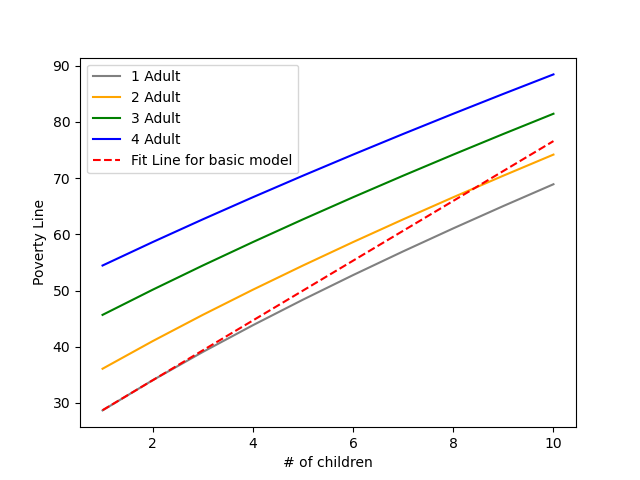

Text(0, 0.5, 'Poverty Line')

In [15]:
plt.figure("SPM Threshold with respect to number of children and adults: No Mortgage ")
plt.plot(Number_of_children,No_Mortgage*Single_Adults_with_children(Number_of_children)/1000, color= 'grey',label = "1 Adult")
plt.plot(Number_of_children,No_Mortgage*Multiple_Adults_with_children(2,Number_of_children)/1000, color = 'orange',label = "2 Adult")
plt.plot(Number_of_children,No_Mortgage*Multiple_Adults_with_children(3,Number_of_children)/1000, color = "green",label = "3 Adult")
plt.plot(Number_of_children,No_Mortgage*Multiple_Adults_with_children(4,Number_of_children)/1000, color = "blue",label = "4 Adult")
plt.plot(Number_of_children,No_Mortgage*(Number_of_children*0.28 + 1.231)/1000, linestyle ="--", color = "red",label = "Fit Line for basic model")
plt.legend()
plt.xlabel("# of children")
plt.ylabel("Poverty Line")

<IPython.core.display.Javascript object>


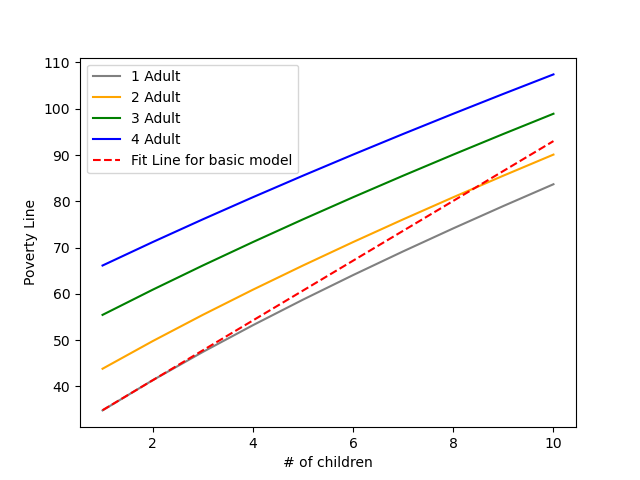

Text(0, 0.5, 'Poverty Line')

In [16]:
plt.figure("SPM Threshold with respect to number of children and adults: Renter")
plt.plot(Number_of_children,Renter*Single_Adults_with_children(Number_of_children)/1000, color= 'grey',label = "1 Adult")
plt.plot(Number_of_children,Renter*Multiple_Adults_with_children(2,Number_of_children)/1000, color = 'orange',label = "2 Adult")
plt.plot(Number_of_children,Renter*Multiple_Adults_with_children(3,Number_of_children)/1000, color = "green",label = "3 Adult")
plt.plot(Number_of_children,Renter*Multiple_Adults_with_children(4,Number_of_children)/1000, color = "blue",label = "4 Adult")
plt.plot(Number_of_children,Renter*(Number_of_children*0.28 + 1.231)/1000, linestyle ="--", color = "red",label = "Fit Line for basic model")
plt.legend()
plt.xlabel("# of children")
plt.ylabel("Poverty Line")

Time of note I am currently on hour 4 of research and have downloaded 2 files with 11 tabs open regarding data I have used or used to read about the subject. 

Modify the numbers and show how easy it would be to do a little bit more digging to find where we chould be investing in if we wanted to lower the amount of people in poverty. 

22723.848009313795

19002.714019978783

23072.87745049708

The above three numbers are the costs for americans we base our entire system on if we wanted to lower the number of people in poverty we should focus on investing and lowering these three numbers in whatever way we can. 

In [123]:
a = np.array([1,0.7,0.85,1,0.8,0.7]) # parameter to account for the needs of the first child
ß = np.array([1,0.7,0.85,1,0.5,0.45]) # parameter to account for the needs of additional children
f = np.array([0.5,0.75,0.65,0.6,0.7,0.75]) # parameter to account for economies of scale within the consumer unit

def SPM(A, # number of adults within the consumer unit
        K):# number of children within the consumer unit
    scale = (1+a*(A-1) + ß*K)**f
    return scale


In [124]:
Mortgage = 36915/Multiple_Adults_with_children(1,2)
No_Mortgage = 30870/Multiple_Adults_with_children(1,2)
Renter = 37482/Multiple_Adults_with_children(1,2)
print(Mortgage)
print(No_Mortgage)
print(Renter)

[21312.88518714 19144.51821384 19356.0362175  19095.45978703
 22723.84800931 22810.65058664]
[17822.80280988 16009.51584075 16186.39680439 15968.49095559
 19002.71401998 19075.30227847]
[21640.24278977 19438.57054561 19653.33738329 19388.7586005
 23072.8774505  23161.01328155]


[15968.490955589052, 23834.985344780216, 30869.999999999996, 35645.6056197675, 39852.99863247433, 43656.772670457445, 47154.7039010956, 50410.49890647781, 53468.408429651245, 56360.651167281605]
[23161.01328155458, 30645.424438810813, 37482.0, 45413.5649717182, 52905.646101876824, 60058.393401538684, 66937.09072573888, 73587.37884221341, 80042.80079129859, 86328.95227028895]


<IPython.core.display.Javascript object>


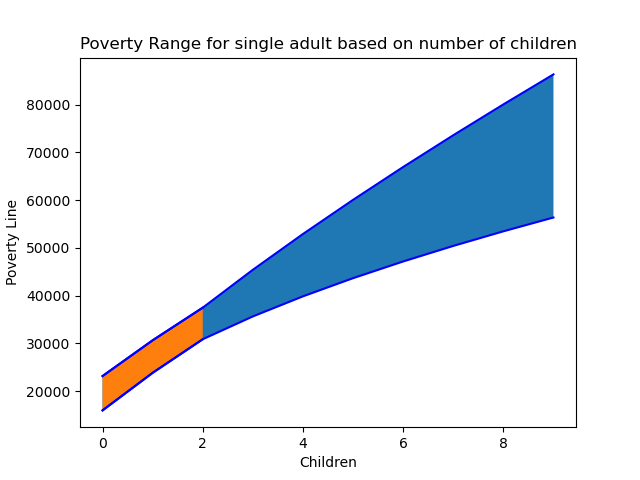

In [161]:
mortgage = []
nomortgage = []
renter = []
kids = []
pmin = []
pmax = []
for i in range(10):
    mortgage.append(SPM(1,i)*Mortgage)
    nomortgage.append(SPM(1,i)*No_Mortgage)
    renter.append(SPM(1,i)*Renter)
    kids.append(i)
    pmin.append(min(np.append(renter[i],[nomortgage[i],mortgage[i]])))
    pmax.append(max(np.append(renter[i],[nomortgage[i],mortgage[i]])))
print(pmin)
print(pmax)

plt.figure(23)
plt.title("Poverty Range for single adult based on number of children")
#plt.plot(kids,mortgage)
#plt.plot(kids,nomortgage)
#plt.plot(kids,renter)
plt.plot(kids,pmin,"b")
plt.plot(kids,pmax,"b")
plt.ylabel("Poverty Line")
plt.xlabel("Children")
plt.fill_between(kids, pmax, pmin)

In [164]:
mortgage = []
nomortgage = []
renter = []
kids = []
pmin = []
pmax = []
for i in range(3):
    mortgage.append(SPM(1,i)*Mortgage)
    nomortgage.append(SPM(1,i)*No_Mortgage)
    renter.append(SPM(1,i)*Renter)
    kids.append(i)
    pmin.append(min(np.append(renter[i],[nomortgage[i],mortgage[i]])))
    pmax.append(max(np.append(renter[i],[nomortgage[i],mortgage[i]])))
print(pmin)
print(pmax)

plt.figure(24)
plt.title("Poverty Range for single adult based on number of children")
#plt.plot(kids,mortgage)
#plt.plot(kids,nomortgage)
#plt.plot(kids,renter)
plt.plot(kids,pmin,"b")
plt.plot(kids,pmax,"b")
plt.ylabel("Poverty Line")
plt.xlabel("Children")
plt.fill_between(kids, pmax, pmin)


[15968.490955589052, 23834.985344780216, 30869.999999999996]
[23161.01328155458, 30645.424438810813, 37482.0]


<IPython.core.display.Javascript object>